In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

Derivative and total charge transfer of a current ramp stimulus with a fixed amplitude.

In [2]:
deriv = np.linspace(10, 1000)
charge = 100. / (2. * deriv)

In [3]:
charge

array([5.        , 1.65540541, 0.99190283, 0.70809249, 0.5505618 ,
       0.45036765, 0.38102644, 0.33018868, 0.29131986, 0.2606383 ,
       0.23580366, 0.21528998, 0.19805982, 0.18338323, 0.17073171,
       0.15971317, 0.15003062, 0.14145497, 0.13380666, 0.12694301,
       0.12074914, 0.11513158, 0.11001347, 0.10533104, 0.10103093,
       0.09706815, 0.0934045 , 0.09000735, 0.08684864, 0.08390411,
       0.0811527 , 0.07857601, 0.07615791, 0.0738842 , 0.07174231,
       0.06972112, 0.06781068, 0.06600216, 0.06428759, 0.06265985,
       0.0611125 , 0.05963973, 0.05823627, 0.05689735, 0.05561862,
       0.05439609, 0.05322616, 0.05210549, 0.05103104, 0.05      ])

In [4]:
def sigmoid(arr, slope, offset):
    return 1. / (1 + np.exp(-slope * (arr - offset)))

def relu(arr, offset):
    return np.max([np.zeros_like(arr), np.asarray(arr) - offset], axis=0)

def pop_firing_rate(charge_slope, charge_threshold, adaptation_slope, adaptation_offset):
    return (
        sigmoid(charge, charge_slope, charge_threshold) 
        * sigmoid(deriv, adaptation_slope, adaptation_offset)
    )

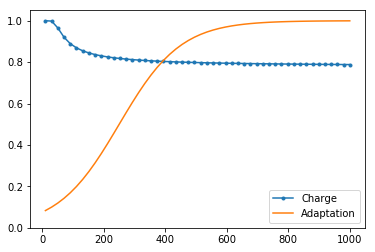

In [5]:
charge_slope = 5
charge_threshold = 1
adaptation_slope = 0.01
adaptation_threshold = 250

plt.plot(deriv, sigmoid(charge, charge_slope, charge_threshold)**0.05, '.-', label='Charge')
plt.plot(deriv, sigmoid(deriv, adaptation_slope, adaptation_threshold), label='Adaptation')
plt.ylim(0, 1.05)
plt.legend()

(0, 1)

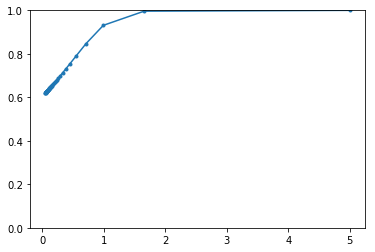

In [6]:
plt.plot(charge, 
         sigmoid(charge, charge_slope, charge_threshold)**0.1, 
         '.-',
         label='Charge')
plt.ylim(0, 1)

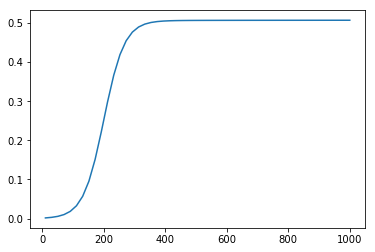

In [7]:
#plt.plot(deriv, sigmoid(deriv, 0.03, 200))
plt.plot(deriv, pop_firing_rate(-0.03, 1, 0.03, 200))

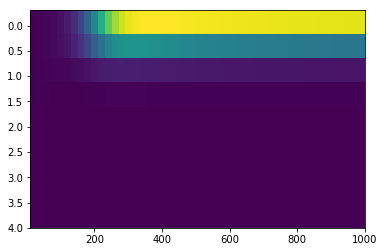

In [8]:
thresholds = np.linspace(-0.3, 4, 10)
plt.pcolormesh(
    deriv,
    thresholds, 
    [
        pop_firing_rate(charge_slope, thresh, 0.03, 200)
        for thresh in thresholds
    ]
)
plt.gca().invert_yaxis()

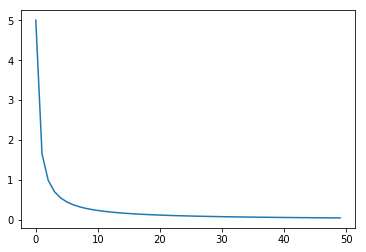

In [9]:
plt.plot(charge)

In [10]:
def pop_firing_rate(charge_slope, charge_threshold, adaptation_slope, adaptation_threshold):
    return np.exp(charge_slope * (charge - charge_threshold)) * sigmoid(deriv, adaptation_slope, adaptation_threshold)

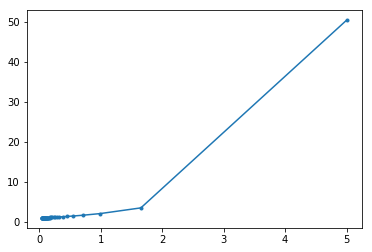

In [11]:
charge_slope = 0.8
charge_threshold = 0.1
plt.plot(charge, np.exp(charge_slope * (charge - charge_threshold)), '.-')

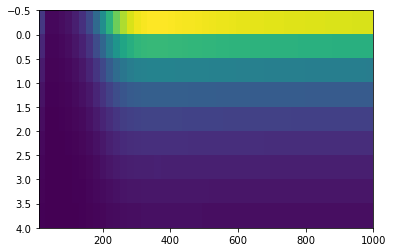

In [12]:
charge_slope = 0.8

thresholds = np.linspace(-0.5, 4, 10)
plt.pcolormesh(
    deriv,
    thresholds, 
    [
        pop_firing_rate(charge_slope, thresh, 0.03, 200)
        for thresh in thresholds
    ]
)
plt.gca().invert_yaxis()

In [13]:
def to_k0(tau):
    return 1. / (tau * 2 * np.pi)

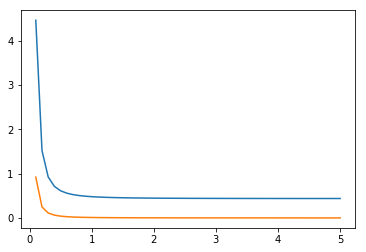

In [14]:
plt.plot(np.fft.rfftfreq(100, 0.1)[1:], np.fft.rfft(np.exp(-np.linspace(0, 10, 100)/5.)).real[1:])
plt.plot(np.linspace(0.1, 5), to_k0(5) / (np.pi * (to_k0(5)**2 + np.linspace(0.1, 5)**2)))

---

In [15]:
def y_inf(amplitude, derivative, time_constant):
    return (
        amplitude/time_constant
        -  derivative * (
            np.exp(-1 / (time_constant * derivative)) - 1
        )
    )

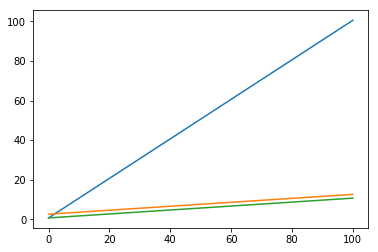

In [16]:
x = np.linspace(0, 100)
plt.plot(x, y_inf(x, 1, 1))
plt.plot(x, y_inf(x, 4, 10))
plt.plot(x, y_inf(x, 1, 10))

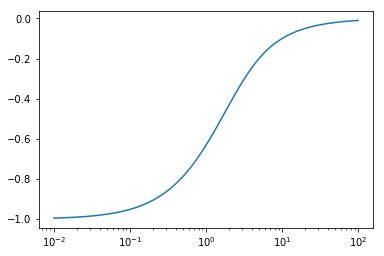

In [17]:
x = np.logspace(-2, 2)
plt.semilogx(x, 1/x * (np.exp(-x) - 1))

The firing rate of a LIF model is $$\rho = \frac{-1}{\tau \log(1 - \theta/y(\infty))}$$

For a LIF model, the voltage at the end of a ramp stimulus from 0 to $I$
$$$$

In [18]:
def rate(time_constant, threshold, equilibrium):
    return -1. / (time_constant * np.log(1. - float(threshold) / equilibrium))

In [19]:
def mod(amplitude, derivative, time_constant, threshold):
    equilibrium = y_inf(amplitude, derivative, time_constant)
    print(equilibrium/threshold)
    return rate(time_constant, threshold, equilibrium)

In [20]:
def norm(x):
    return x / np.nanmax(x)

In [21]:
x

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

/home/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


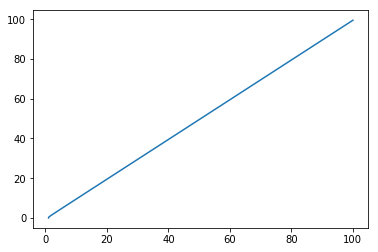

In [22]:
x = np.logspace(0, 2)
plt.plot(x, rate(1, 1, x))

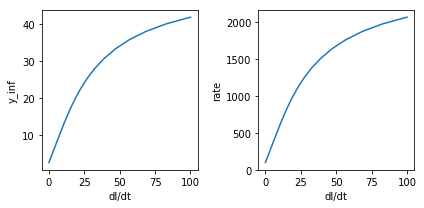

In [23]:
x = np.logspace(-2, 2)
time_constant = 0.02
amplitude = 0.05

plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.plot(x, y_inf(amplitude, x, time_constant))
plt.ylabel('y_inf')
plt.xlabel('dI/dt')

plt.subplot(122)
plt.plot(x, rate(time_constant, 1, y_inf(amplitude, x, time_constant)))
plt.ylabel('rate')
plt.xlabel('dI/dt')

plt.tight_layout()

[1.59999092 1.63024014 1.66500182 1.70484756 1.75031403 1.80182729
 1.85961634 1.92363505 1.9935129  2.06854816 2.14774616 2.22989423
 2.313658   2.39768179 2.48067857 2.56149989 2.63918177 2.71296711
 2.78230813 2.84685382 2.90642759 2.96099972 3.01065833 3.0555813
 3.09601092 3.13223205 3.16455405 3.19329652 3.21877823 3.24130918
 3.2611849  3.27868289 3.29406044 3.30755376 3.31937791 3.3297273
 3.3387767  3.34668241 3.35358368 3.35960412 3.36485309 3.36942716
 3.37341134 3.37688039 3.37989991 3.3825274  3.38481319 3.38680128
 3.38853011 3.39003325]
[10.200002   10.23028108 10.26514427 10.30528559 10.35150412 10.40471993
 10.46599236 10.53654116 10.61777072 10.71129806 10.81898501 10.94297527
 11.08573708 11.25011224 11.43937202 11.65727803 11.90813941 12.19683968
 12.52878021 12.90966355 13.345047   13.83965408 14.39652697 15.01619419
 15.69606206 16.4301963  17.20955878 18.02264942 18.85641725 19.69726894
 20.53201643 21.3486501  22.13687926 22.88843175 23.59713969 24.25885805
 24.

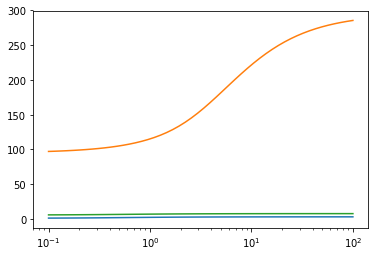

In [24]:
x = np.logspace(-1, 2)
plt.semilogx(x, mod(0.7, x, 1, 0.5))
plt.semilogx(x, mod(0.5000001, x, 0.1, 0.5))
plt.semilogx(x, mod(3, x, 1, 0.5))

[ 4.2         4.23027908  4.26514227  4.30528359  4.35150212  4.40471793
  4.46599036  4.53653916  4.61776872  4.71129606  4.81898301  4.94297327
  5.08573509  5.25011039  5.43937135  5.65728555  5.90819095  6.19708226
  6.52971009  6.91269379  7.35364371  7.86127302  8.44544256  9.11702728
  9.8874491  10.76774251 11.76714171 12.89137298 14.14101135 15.5103181
 16.98687787 18.55214633 20.18279086 21.85254218 23.53421237 25.20156834
 26.83084232 28.40177232 29.89816278 31.3080245  32.62338869 33.83989981
 34.95628326 35.97376584 36.89550611 37.72607153 38.47098304 39.13633527
 39.72849171 40.25384938]
[ 4.2         4.23027908  4.26514227  4.30528359  4.35150212  4.40471793
  4.46599036  4.53653916  4.61776872  4.71129606  4.81898301  4.94297327
  5.08573509  5.25011039  5.43937135  5.65728555  5.90819095  6.19708226
  6.52971009  6.91269379  7.35364371  7.86127302  8.44544256  9.11702728
  9.8874491  10.76774251 11.76714171 12.89137298 14.14101135 15.5103181
 16.98687787 18.55214633 20

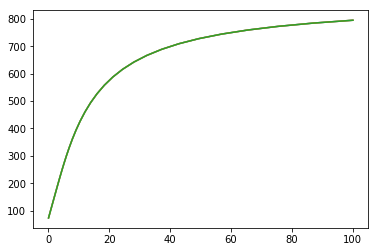

In [25]:
x = np.logspace(-1, 2)
plt.plot(x, mod(0.1, x, 0.05, 0.5))
plt.plot(x, mod(0.1, x, 0.05, 0.5))
plt.plot(x, mod(0.1, x, 0.05, 0.5))

[4.39998184 4.46048029 4.53000363 4.60969513 4.70062806 4.80365458
 4.91923268 5.0472701  5.1870258  5.33709632 5.49549232 5.65978846
 5.827316   5.99536358 6.16135715 6.32299978 6.47836353 6.62593421
 6.76461626 6.89370764 7.01285517 7.12199944 7.22131667 7.31116261
 7.39202185 7.46446409 7.52910811 7.58659304 7.63755647 7.68261836
 7.72236981 7.75736577 7.78812087 7.81510753 7.83875582 7.85945461
 7.87755339 7.89336481 7.90716737 7.91920824 7.92970619 7.93885431
 7.94682267 7.95376078 7.95979983 7.96505481 7.96962638 7.97360255
 7.97706022 7.9800665 ]
[2.19999092 2.23024014 2.26500182 2.30484756 2.35031403 2.40182729
 2.45961634 2.52363505 2.5935129  2.66854816 2.74774616 2.82989423
 2.913658   2.99768179 3.08067857 3.16149989 3.23918177 3.31296711
 3.38230813 3.44685382 3.50642759 3.56099972 3.61065833 3.6555813
 3.69601092 3.73223205 3.76455405 3.79329652 3.81877823 3.84130918
 3.8611849  3.87868289 3.89406044 3.90755376 3.91937791 3.9297273
 3.9387767  3.94668241 3.95358368 3.9596

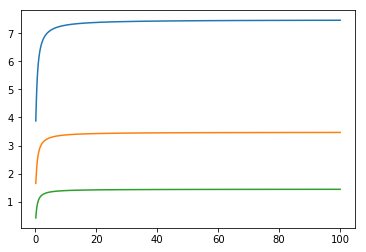

In [26]:
x = np.logspace(-1, 2)
plt.plot(x, mod(1, x, 1., 0.25))
plt.plot(x, mod(1., x, 1., 0.5))
plt.plot(x, mod(1, x, 1., 1))

---

In [27]:
TIME_STEP = 0.1

In [30]:
def exp_kernel(time_constant):
    time = np.arange(0, time_constant * 10, TIME_STEP)
    return np.exp(-time/time_constant)


def get_ramp_by_deriv(derivative, amplitude=100):
    """Get a ramp stimulus with a given amplitude and derivative.
    
    Parameters
    ----------
    derivative: float
        Derivative of the ramp in pA/s.
    amplitude: float
        Amplitude of the ramp in pA.
        
    """
    duration = 1e3 / derivative * amplitude  # Duration of the ramp in ms.
    ramp = np.linspace(0, amplitude, int(duration/TIME_STEP - 0.5))
    return ramp


def get_convolver(stimulus, kernel):
    """Get a function that evaluates the convolution of a stimulus vector with a kernel."""
    def convolve(t='end'):
        if t == 'end':
            timestep = len(stimulus)
        else:
            timestep = int(t/TIME_STEP - 0.5)
            
        if timestep > len(stimulus):
            raise ValueError(
                'Time t={} is greater than stimulus duration {}'.format(t, len(stimulus) * TIME_STEP)
            )
            
        return np.dot(stimulus[max(0, timestep - len(kernel)):timestep], np.flip(kernel[:min(timestep, len(kernel))]))
    return convolve


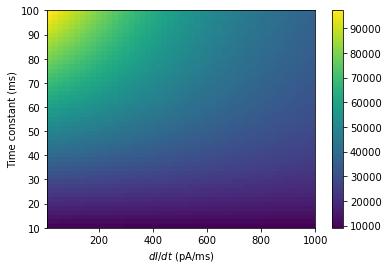

In [38]:
derivs = np.linspace(10, 1000)
time_constants = np.linspace(10, 100)

peak = [
    [
        get_convolver(get_ramp_by_deriv(deriv), exp_kernel(time_const))()
        for deriv in derivs
    ]
    for time_const in time_constants
]

mappable = plt.pcolormesh(derivs, time_constants, peak)
plt.ylabel('Time constant (ms)')
plt.xlabel('$dI/dt$ (pA/ms)')

plt.gcf().colorbar(mappable)

In [40]:
def get_peak(amplitude, deriv, time_constant):
    # Correct up to a constant factor of membrame resistance
    d = deriv * 1e-3  # Deriv in pA/ms
    return time_constant * (time_constant * d * (np.exp(-amplitude/(d * time_constant)) - 1.) + amplitude)

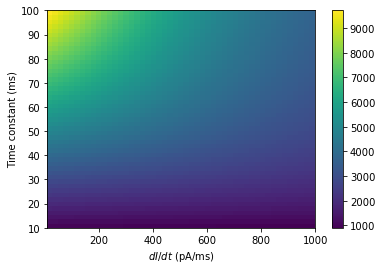

In [63]:
peak = [
    [
        get_peak(100., deriv, time_const)
        for deriv in derivs
    ]
    for time_const in time_constants
]

mappable = plt.pcolormesh(derivs, time_constants, np.asarray(peak))
plt.ylabel('Time constant (ms)')
plt.xlabel('$dI/dt$ (pA/ms)')

plt.gcf().colorbar(mappable)

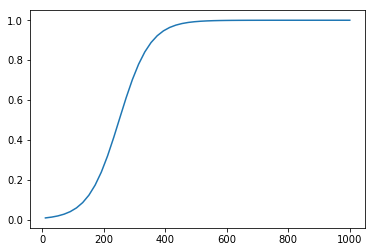

In [69]:
plt.plot(derivs, sigmoid(derivs, 0.02, 250))

In [ ]:
plt.pcolormesh(
)

/home/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


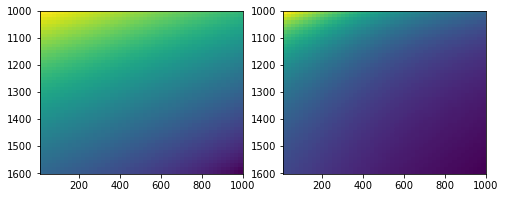

In [73]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
these_peaks = np.asarray([get_peak(100., deriv, 20.) for deriv in derivs])
plt.pcolormesh(
    derivs,
    np.linspace(1000, these_peaks.min()),
    [rate(20., thresh, these_peaks)
     for thresh in np.linspace(1000, these_peaks.min())
    ]
)
min_thresh = these_peaks.min()
plt.gca().invert_yaxis()

plt.subplot(122)
these_peaks = np.asarray([get_peak(100., deriv, 100.) for deriv in derivs])
plt.pcolormesh(
    derivs,
    np.linspace(1000, min_thresh),
    [rate(100., thresh, these_peaks)
     for thresh in np.linspace(1000, these_peaks.min())
    ]
)
plt.gca().invert_yaxis()

/home/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


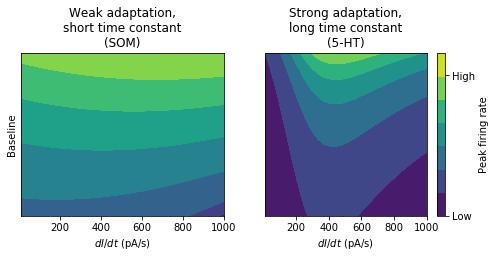

In [89]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
plt.title('Weak adaptation,\nshort time constant\n(SOM)')
these_peaks = np.asarray([get_peak(100., deriv, 20.) for deriv in derivs])
these_fr_peaks = np.asarray([rate(20., thresh, these_peaks)
    for thresh in np.linspace(1000, these_peaks.min())
])
plt.contourf(
    derivs,
    np.linspace(1000, these_peaks.min()),
    these_fr_peaks * (sigmoid(derivs, 0.001, 250))
)
min_thresh = these_peaks.min()
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('Baseline')
plt.xlabel('$dI/dt$ (pA/s)')

plt.subplot(122)
plt.title('Strong adaptation,\nlong time constant\n(5-HT)')
these_peaks = np.asarray([get_peak(100., deriv, 100.) for deriv in derivs])
these_fr_peaks = [rate(100., thresh, these_peaks)
    for thresh in np.linspace(1000, these_peaks.min())
]
mappable = plt.contourf(
    derivs,
    np.linspace(1000, min_thresh),
    these_fr_peaks * sigmoid(derivs, 0.01, 250)
)
plt.gca().invert_yaxis()
plt.yticks([])
plt.xlabel('$dI/dt$ (pA/s)')
cbar = plt.gcf().colorbar(mappable)
cbar.set_ticks([0, (these_fr_peaks * sigmoid(derivs, 0.01, 250)).max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Peak firing rate')

/home/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


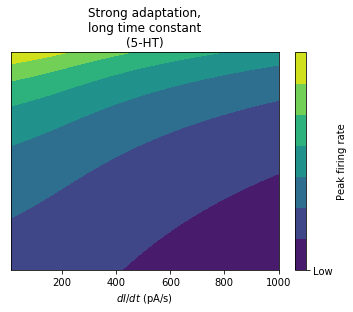

In [93]:
plt.subplot(111)
plt.title('Strong adaptation,\nlong time constant\n(5-HT)')
these_peaks = np.asarray([get_peak(100., deriv, 100.) for deriv in derivs])
these_fr_peaks = [rate(100., thresh, these_peaks)
    for thresh in np.linspace(1000, these_peaks.min())
]
mappable = plt.contourf(
    derivs,
    np.linspace(1000, min_thresh),
    these_fr_peaks * sigmoid(derivs, 0.001, 250)
)
plt.gca().invert_yaxis()
plt.yticks([])
plt.xlabel('$dI/dt$ (pA/s)')
cbar = plt.gcf().colorbar(mappable)
cbar.set_ticks([0, (these_fr_peaks * sigmoid(derivs, 0.01, 250)).max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Peak firing rate')